# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [3]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])

    vis.add_point(points_right, s=30, color=['orange'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.show()

In [6]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

In [7]:
def counter(tab1, tab2, tab3):
    return len(tab1), len(tab2), len(tab3)

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

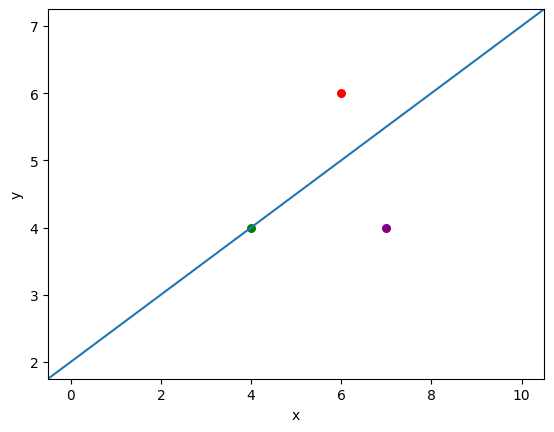

In [8]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [9]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    tab = []
    
    for i in range(n):
        tab.append(np.random.uniform(left, right, 2))

                   
    return tab
    # raise Exception("Unimplemented")

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [10]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

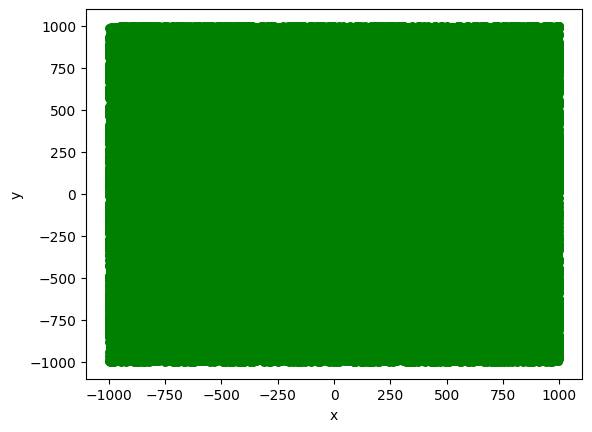

In [11]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [12]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

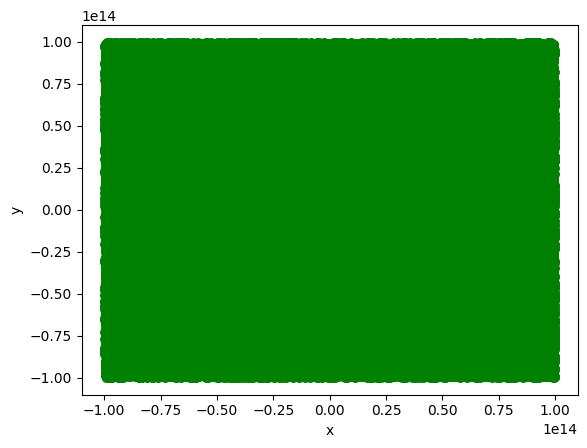

In [13]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [14]:
def generate_circle_points(O, R = 100, n=1000):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    alpha = np.random.uniform(0, 2 * np.pi, n)
    x = O[0] + R * np.cos(alpha)
    y = O[1] + R * np.sin(alpha)

    points = np.column_stack((x, y))
    return points


<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [15]:
points_c = generate_circle_points((0, 0), 100, 1000)

Zwizualizuj wygenerowane punkty.

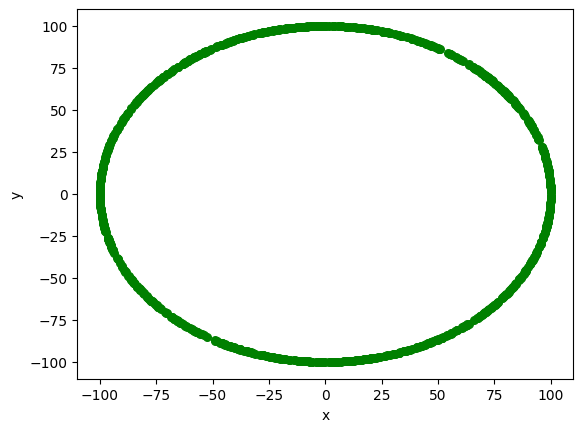

In [16]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [17]:
def generate_collinear_points(a, b, n=1000):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na odcinku ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    t = np.random.uniform(0, 1, n)
    x = a[0] + t*(b[0] - a[0])
    y = a[1] + t*(b[1] - a[1])
    return np.column_stack((x, y))
    

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [18]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1), 1000)

Zwizualizuj wygenerowane punkty.

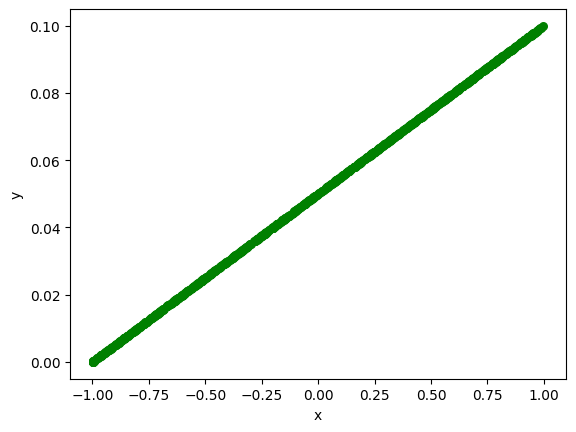

In [19]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [20]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.640s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [21]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return a[0]*b[1]*1 + b[0]*c[1]*1 + a[1]*1*c[0] - (1*b[1]*c[0]+1*c[1]*a[0]+a[1]*b[0]*1)
    # raise Exception("Unimplemented")

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [22]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    matrix3x3 = np.array([[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]])
    determinant = np.linalg.det(matrix3x3)
    return determinant

Uzupełnij funkcje ```mat_det_2x2```

In [23]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (a[0]-c[0])*(b[1]-c[1]) - (a[1]-c[1])*(b[0]-c[0])
    # raise Exception("Unimplemented")

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [24]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    matrix2x2 = np.array([[a[0]-c[0], a[1]-c[1]], [b[0]-c[0], b[1]-c[1]]])
    determinant = np.linalg.det(matrix2x2)
    return determinant
    # raise Exception("Unimplemented")

Przetestujmy napisane powyżej funkcje.

In [25]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [26]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """
    left = []
    right = []
    on = []
    
    for c in points:
        det = mat_det_func(a, b, c)

        if -eps <= det <= eps:
            on.append(c)
        elif det > eps:
            left.append(c)
        else:
            right.append(c)

    return left, on, right
        
    # raise Exception("Unimplemented")

In [27]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [28]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -12)

(49999, 0, 50001)


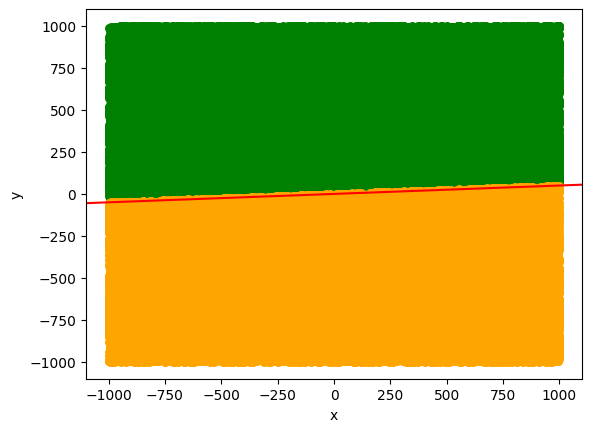

In [29]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(counter(classified_points_a_left, classified_points_a_mid, classified_points_a_right))

In [30]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)

(49942, 0, 50058)


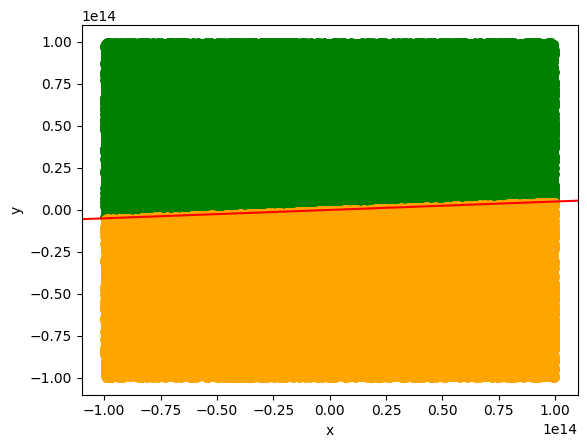

In [31]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(counter(classified_points_b_left, classified_points_b_mid, classified_points_b_right))

In [32]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)

(491, 0, 509)


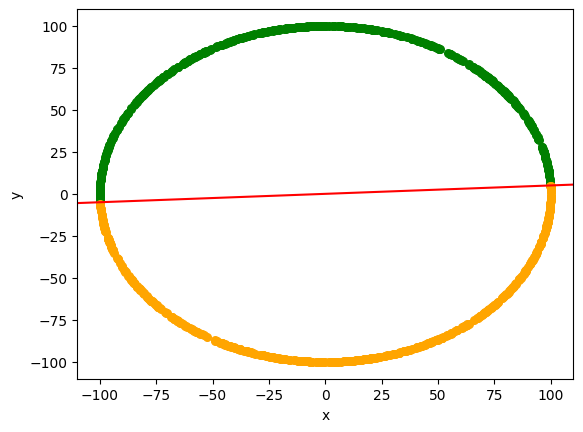

In [33]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(counter(classified_points_c_left, classified_points_c_mid, classified_points_c_right))

In [34]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)

(0, 1000, 0)


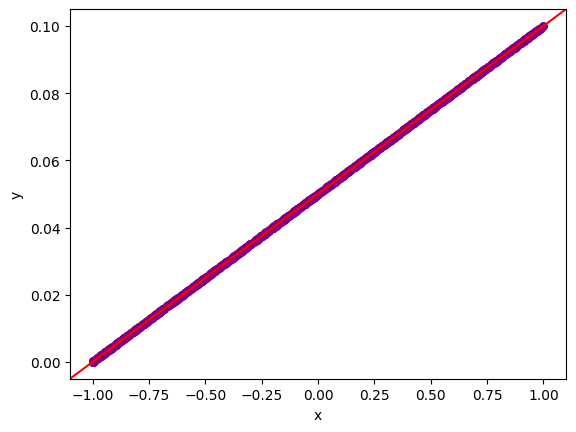

In [35]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(counter(classified_points_d_left, classified_points_d_mid, classified_points_d_right))

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [36]:
# points_a_float32 = np.float32(points_a)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.


In [37]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -12)

(49999, 0, 50001)


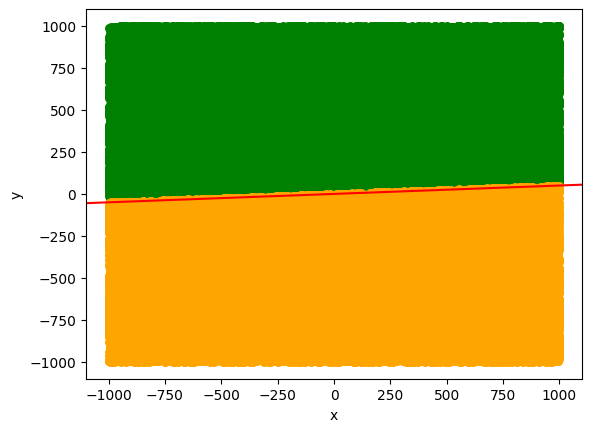

In [38]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(counter(classified_points_a_left, classified_points_a_mid, classified_points_a_right))

In [39]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -12)

(49942, 0, 50058)


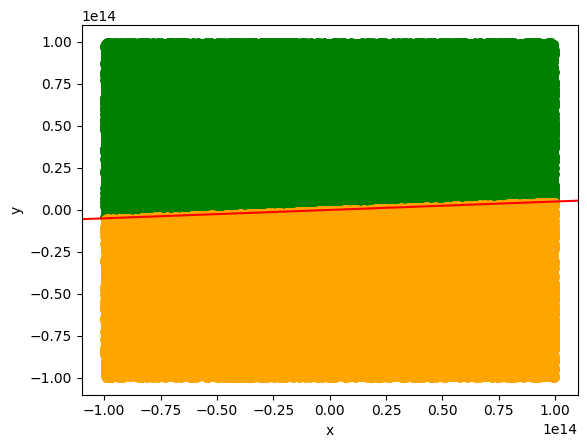

In [40]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(counter(classified_points_b_left, classified_points_b_mid, classified_points_b_right))

In [41]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -12)

(49940, 5, 50055)


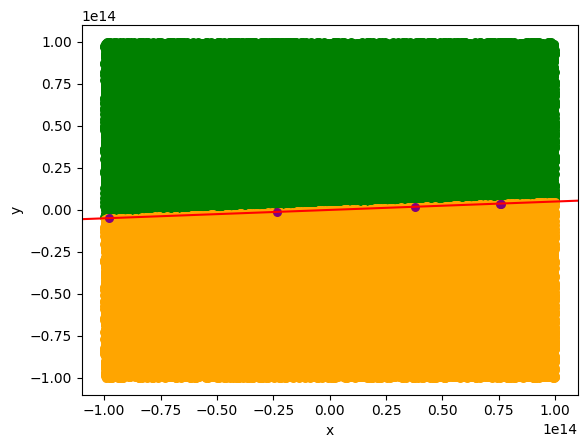

In [42]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(counter(classified_points_b_left, classified_points_b_mid, classified_points_b_right))

In [43]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -12)

(49940, 7, 50053)


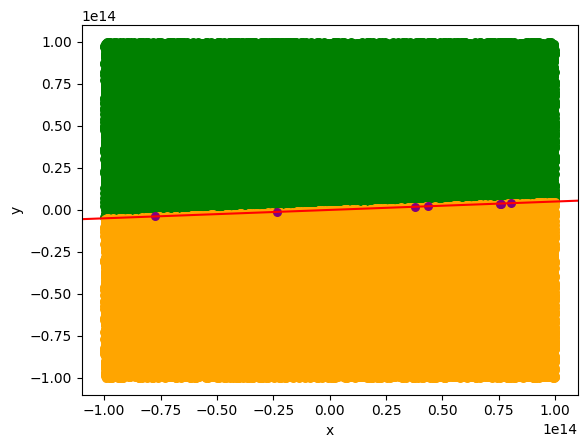

In [44]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(counter(classified_points_b_left, classified_points_b_mid, classified_points_b_right))

In [45]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -12)

(49999, 0, 50001)


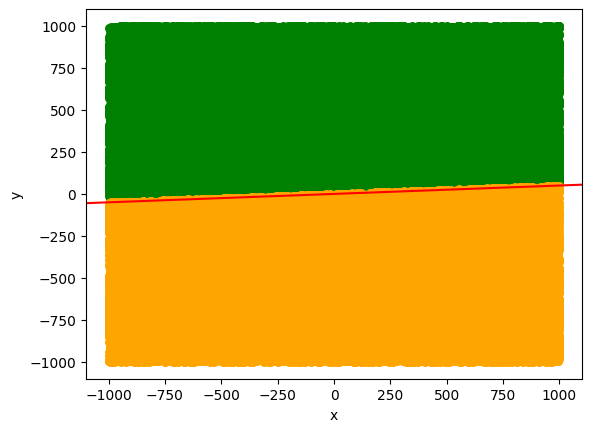

In [46]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(counter(classified_points_a_left, classified_points_a_mid, classified_points_a_right))

In [47]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -12)

(49999, 0, 50001)


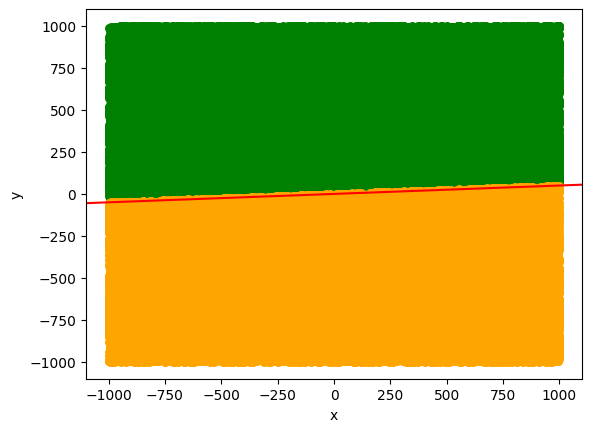

In [48]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(counter(classified_points_a_left, classified_points_a_mid, classified_points_a_right))

In [49]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -12)

(491, 0, 509)


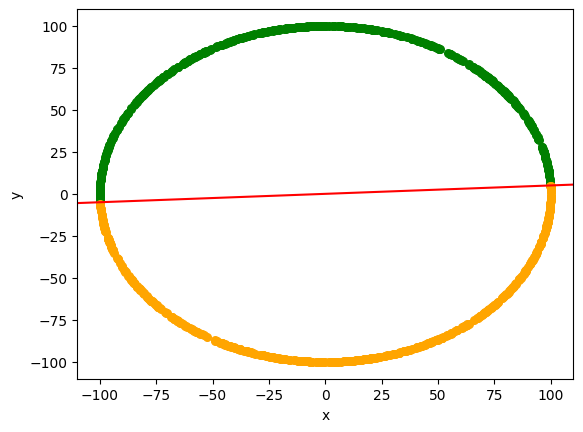

In [50]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(counter(classified_points_c_left, classified_points_c_mid, classified_points_c_right))

In [51]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -12)

(491, 0, 509)


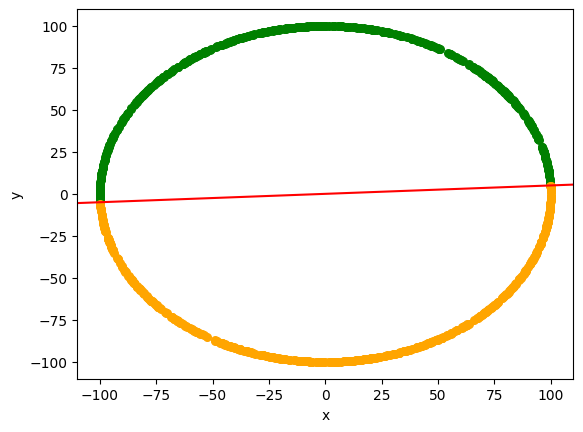

In [52]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(counter(classified_points_c_left, classified_points_c_mid, classified_points_c_right))

In [53]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -12)

(491, 0, 509)


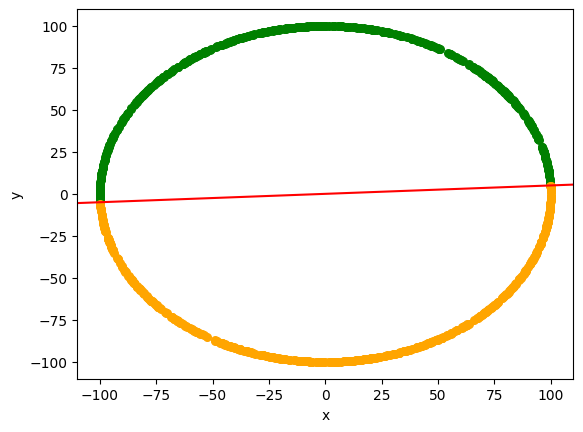

In [54]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(counter(classified_points_c_left, classified_points_c_mid, classified_points_c_right))

In [55]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2, 10 ** -12)

(0, 1000, 0)


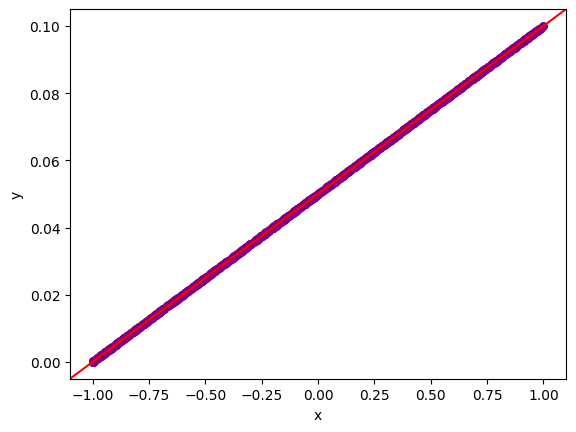

In [56]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(counter(classified_points_d_left, classified_points_d_mid, classified_points_d_right))

In [57]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3_lib, 10 ** -12)

(0, 1000, 0)


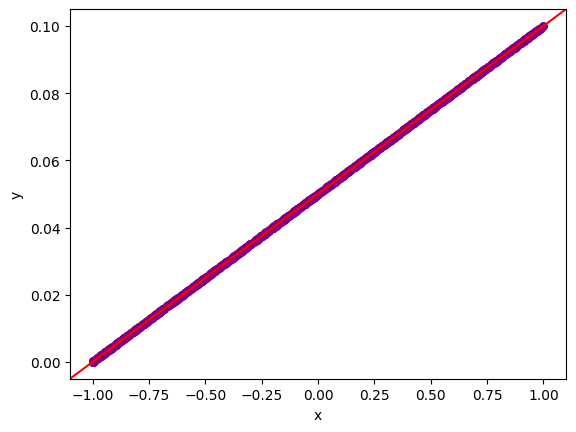

In [58]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(counter(classified_points_d_left, classified_points_d_mid, classified_points_d_right))

In [59]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3, 10 ** -12)

(0, 1000, 0)


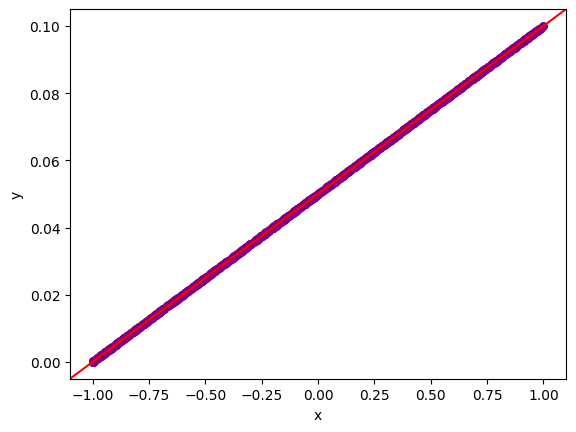

In [60]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(counter(classified_points_d_left, classified_points_d_mid, classified_points_d_right))

In [61]:
epsilons = [10**-8, 10**-10, 10**-12, 10**-14, 0]
for eps in epsilons:
    dets = [mat_det_3x3_lib, mat_det_3x3, mat_det_2x2_lib, mat_det_2x2]
    tab_A = []
    tab_B = []
    tab_C = []
    tab_D = []
    for det in dets:
        tab_A.append(counter(*categorize_points(points_a, a, b, det, eps)))
        tab_B.append(counter(*categorize_points(points_b, a, b, det, eps)))
        tab_C.append(counter(*categorize_points(points_c, a, b, det, eps)))
        tab_D.append(counter(*categorize_points(points_d, a, b, det, eps)))
    
        
    
    d = {
        'A': tab_A,
        'B': tab_B,
        'C': tab_C,
        'D': tab_D,}
    
    df = pd.DataFrame(data=d)
    
    print(f"========== {eps} ==========")
    display(df.style.relabel_index(["mat_det_3x3_lib", "mat_det_3x3", "mat_det_2x2_lib", "mat_det_2x2"], axis=0))
    print("\n")
    

========== 1e-08 ==========


,A,B,C,D
mat_det_3x3_lib,"(49999, 0, 50001)","(49942, 0, 50058)","(491, 0, 509)","(0, 1000, 0)"
mat_det_3x3,"(49999, 0, 50001)","(49942, 0, 50058)","(491, 0, 509)","(0, 1000, 0)"
mat_det_2x2_lib,"(49999, 0, 50001)","(49940, 5, 50055)","(491, 0, 509)","(0, 1000, 0)"
mat_det_2x2,"(49999, 0, 50001)","(49940, 7, 50053)","(491, 0, 509)","(0, 1000, 0)"




========== 1e-10 ==========


,A,B,C,D
mat_det_3x3_lib,"(49999, 0, 50001)","(49942, 0, 50058)","(491, 0, 509)","(0, 1000, 0)"
mat_det_3x3,"(49999, 0, 50001)","(49942, 0, 50058)","(491, 0, 509)","(0, 1000, 0)"
mat_det_2x2_lib,"(49999, 0, 50001)","(49940, 5, 50055)","(491, 0, 509)","(0, 1000, 0)"
mat_det_2x2,"(49999, 0, 50001)","(49940, 7, 50053)","(491, 0, 509)","(0, 1000, 0)"




========== 1e-12 ==========


,A,B,C,D
mat_det_3x3_lib,"(49999, 0, 50001)","(49942, 0, 50058)","(491, 0, 509)","(0, 1000, 0)"
mat_det_3x3,"(49999, 0, 50001)","(49942, 0, 50058)","(491, 0, 509)","(0, 1000, 0)"
mat_det_2x2_lib,"(49999, 0, 50001)","(49940, 5, 50055)","(491, 0, 509)","(0, 1000, 0)"
mat_det_2x2,"(49999, 0, 50001)","(49940, 7, 50053)","(491, 0, 509)","(0, 1000, 0)"




========== 1e-14 ==========


,A,B,C,D
mat_det_3x3_lib,"(49999, 0, 50001)","(49942, 0, 50058)","(491, 0, 509)","(0, 1000, 0)"
mat_det_3x3,"(49999, 0, 50001)","(49942, 0, 50058)","(491, 0, 509)","(0, 1000, 0)"
mat_det_2x2_lib,"(49999, 0, 50001)","(49940, 5, 50055)","(491, 0, 509)","(0, 1000, 0)"
mat_det_2x2,"(49999, 0, 50001)","(49940, 7, 50053)","(491, 0, 509)","(0, 1000, 0)"




========== 0 ==========


,A,B,C,D
mat_det_3x3_lib,"(49999, 0, 50001)","(49942, 0, 50058)","(491, 0, 509)","(165, 835, 0)"
mat_det_3x3,"(49999, 0, 50001)","(49942, 0, 50058)","(491, 0, 509)","(221, 584, 195)"
mat_det_2x2_lib,"(49999, 0, 50001)","(49940, 5, 50055)","(491, 0, 509)","(311, 371, 318)"
mat_det_2x2,"(49999, 0, 50001)","(49940, 7, 50053)","(491, 0, 509)","(269, 426, 305)"


In [62]:
points_a_float32 = np.float32(points_a)
points_b_float32 = np.float32(points_b)
points_c_float32 = np.float32(points_c)
points_d_float32 = np.float32(points_d)

In [ ]:
epsilons = [10**-8, 10**-10, 10**-12, 10**-14, 0]
for eps in epsilons:
    dets = [mat_det_3x3_lib, mat_det_3x3, mat_det_2x2_lib, mat_det_2x2]
    tab_A = []
    tab_B = []
    tab_C = []
    tab_D = []
    for det in dets:
        tab_A.append(counter(*categorize_points(points_a_float32, a, b, det, eps)))
        tab_B.append(counter(*categorize_points(points_b_float32, a, b, det, eps)))
        tab_C.append(counter(*categorize_points(points_c_float32, a, b, det, eps)))
        tab_D.append(counter(*categorize_points(points_d_float32, a, b, det, eps)))
    
        
    
    d = {
        'A': tab_A,
        'B': tab_B,
        'C': tab_C,
        'D': tab_D,}
    
    df = pd.DataFrame(data=d)
    print(f"========== {eps}, float32 ==========")
    display(df.style.relabel_index(["mat_det_3x3_lib", "mat_det_3x3", "mat_det_2x2_lib", "mat_det_2x2"], axis=0))
    print("\n")

========== 1e-08, float32 ==========


,A,B,C,D
mat_det_3x3_lib,"(49999, 0, 50001)","(49942, 0, 50058)","(491, 0, 509)","(0, 1000, 0)"
mat_det_3x3,"(49999, 0, 50001)","(49942, 0, 50058)","(491, 0, 509)","(0, 1000, 0)"
mat_det_2x2_lib,"(49999, 0, 50001)","(49940, 6, 50054)","(491, 0, 509)","(0, 1000, 0)"
mat_det_2x2,"(49999, 0, 50001)","(49939, 6, 50055)","(491, 0, 509)","(0, 1000, 0)"




========== 1e-10, float32 ==========


,A,B,C,D
mat_det_3x3_lib,"(49999, 0, 50001)","(49942, 0, 50058)","(491, 0, 509)","(398, 149, 453)"
mat_det_3x3,"(49999, 0, 50001)","(49942, 0, 50058)","(491, 0, 509)","(398, 149, 453)"
mat_det_2x2_lib,"(49999, 0, 50001)","(49940, 6, 50054)","(491, 0, 509)","(398, 149, 453)"
mat_det_2x2,"(49999, 0, 50001)","(49939, 6, 50055)","(491, 0, 509)","(398, 149, 453)"


In [ ]:

def draw_diff_points(set, det1, det2, eps1, eps2):
    l1, mid_1, r1 = categorize_points(set, a, b, det1, eps1)
    
    l2, mid_2, r2 = categorize_points(set, a, b, det2, eps2)
    
    tab_mid1 = []
    tab_mid2 = []
    tab_l1 = []
    tab_l2 = []
    tab_r1 = []
    tab_r2 = []
    for i in range(len(mid_1)):
        tab_mid1.append((mid_1[i][0], mid_1[i][1]))
    for i in range(len(mid_2)):
        tab_mid2.append((mid_2[i][0], mid_2[i][1]))
        
    for i in range(len(l1)):
        tab_l1.append((l1[i][0], l1[i][1]))
    for i in range(len(l2)):
        tab_l2.append((l2[i][0], l2[i][1]))
        
    for i in range(len(r1)):
        tab_r1.append((r1[i][0], r1[i][1]))
    for i in range(len(r2)):
        tab_r2.append((r2[i][0], r2[i][1]))

    # 1 - na linii
    # 2 - po lewej
    # 3 - po prawej
    
    tab1 = []
    tab2 = []

    for p in tab_l1:
        tab1.append((p, 2))

    for p in tab_mid1:
        tab1.append((p, 1))
    
    for p in tab_r1:
        tab1.append((p, 3))
            
    for p in tab_l2:
        tab2.append((p, 2))

    for p in tab_mid2:
        tab2.append((p, 1))
    
    for p in tab_r2:
        tab2.append((p, 3))
            
    tab1.sort()
    tab2.sort()
    
    res = []
    for i in range(len(tab1)):
        if tab1[i][1] != tab2[i][1]:
            res.append(tab1[i][0])
            
    print(f"Liczba różnie sklasyfikowanych punktów: {len(res)}")
    draw_points(res)

In [ ]:
draw_diff_points(points_b, mat_det_2x2_lib, mat_det_2x2, 10**-12, 10**-12)

In [ ]:
draw_diff_points(points_d, mat_det_3x3_lib, mat_det_3x3, 0, 0)

In [ ]:
draw_diff_points(points_d, mat_det_2x2_lib, mat_det_2x2, 0, 0)

In [ ]:
draw_diff_points(points_c, mat_det_2x2_lib, mat_det_2x2, 0, 0)

In [ ]:
draw_diff_points(points_c, mat_det_3x3, mat_det_2x2, 0, 0)

In [ ]:
draw_diff_points(points_d, mat_det_2x2_lib, mat_det_2x2, 0, 0)

In [ ]:
draw_diff_points(points_d, mat_det_3x3, mat_det_2x2, 0, 0)

In [ ]:
draw_diff_points(points_d, mat_det_3x3_lib, mat_det_2x2_lib, 0, 0)

In [ ]:
draw_diff_points(points_d_float32, mat_det_3x3, mat_det_3x3_lib, 10**-14, 10**-14)

In [ ]:
draw_diff_points(points_b_float32, mat_det_2x2, mat_det_2x2_lib, 10**-12, 10**-12)

In [ ]:
draw_diff_points(points_d_float32, mat_det_3x3_lib, mat_det_3x3, 0, 0)

In [ ]:
draw_diff_points(points_d_float32, mat_det_2x2_lib, mat_det_2x2, 0, 0)

In [ ]:
draw_diff_points(points_d_float32, mat_det_3x3, mat_det_2x2, 0, 0)

In [ ]:
draw_diff_points(points_d_float32, mat_det_3x3_lib, mat_det_2x2_lib, 0, 0)

In [ ]:
dets = [mat_det_3x3_lib, mat_det_3x3, mat_det_2x2_lib, mat_det_2x2]
for det in dets:
    draw_line(*categorize_points(points_d, a, b, det, 0))
    draw_line(*categorize_points(points_d_float32, a, b, det, 0))
    draw_line(*categorize_points(points_b, a, b, det, 0))
    draw_line(*categorize_points(points_b_float32, a, b, det, 0))